# Wizualizacja danych
## 3a

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
def name_split(cell):
    splitted_by_line = [x.strip() for x in str(cell).split("|")]
    only_values = pd.Series([x.split(" ")[0] for x in splitted_by_line])
    return only_values

In [8]:
tests_time = pd.read_pickle("3aa.pkl")

tests_time[['algorithm', 'data']] = tests_time.Name.apply(name_split)
tests_time

,Name,accuracy,f1_score,log_loss,precision,recall,roc_auc,prec_rec_auc,algorithm,data
0,AdaBoost | 10.0% of data,0.739286,0.748010,9.004752,0.753317,0.747010,0.858962,0.618273,AdaBoost,10.0%
0,AdaBoost | 30.0% of data,0.746190,0.748015,8.766270,0.752440,0.745637,0.858730,0.624200,AdaBoost,30.0%
0,AdaBoost | 50.0% of data,0.710286,0.718291,10.006377,0.728679,0.715963,0.841832,0.583490,AdaBoost,50.0%
0,AdaBoost | 60.0% of data,0.716548,0.719405,9.790098,0.732555,0.717996,0.843254,0.586704,AdaBoost,60.0%
0,AdaBoost | 80.0% of data,0.737321,0.741090,9.072596,0.745271,0.739609,0.855196,0.612381,AdaBoost,80.0%
0,AdaBoost | 100.0% of data,0.690214,0.693554,10.699620,0.709862,0.690326,0.827950,0.552017,AdaBoost,100.0%
0,MLP | 10.0% of data,0.845000,0.841632,5.353510,0.843769,0.845330,0.914048,0.742177,MLP,10.0%
0,MLP | 30.0% of data,0.860952,0.860672,4.802535,0.862481,0.860372,0.922443,0.769402,MLP,30.0%
0,MLP | 50.0% of data,0.867571,0.864721,4.573921,0.867263,0.867241,0.926259,0.773778,MLP,50.0%
0,MLP | 60.0% of data,0.871071,0.869019,4.453035,0.873707,0.870241,0.927957,0.782170,MLP,60.0%


In [9]:
def draw_plot(df, score):
    ADA_df = df[df['algorithm'] == 'AdaBoost']
    MLP_df = df[df['algorithm'] == 'MLP']
    CNN_df = df[df['algorithm'] == 'CNN']
    
    plt.title(score)
    plt.plot(MLP_df['data'], MLP_df[score], label='MLP')
    plt.plot(CNN_df['data'], CNN_df[score], label='CNN')
    plt.plot(ADA_df['data'], ADA_df[score], label='ADA')
    plt.legend()

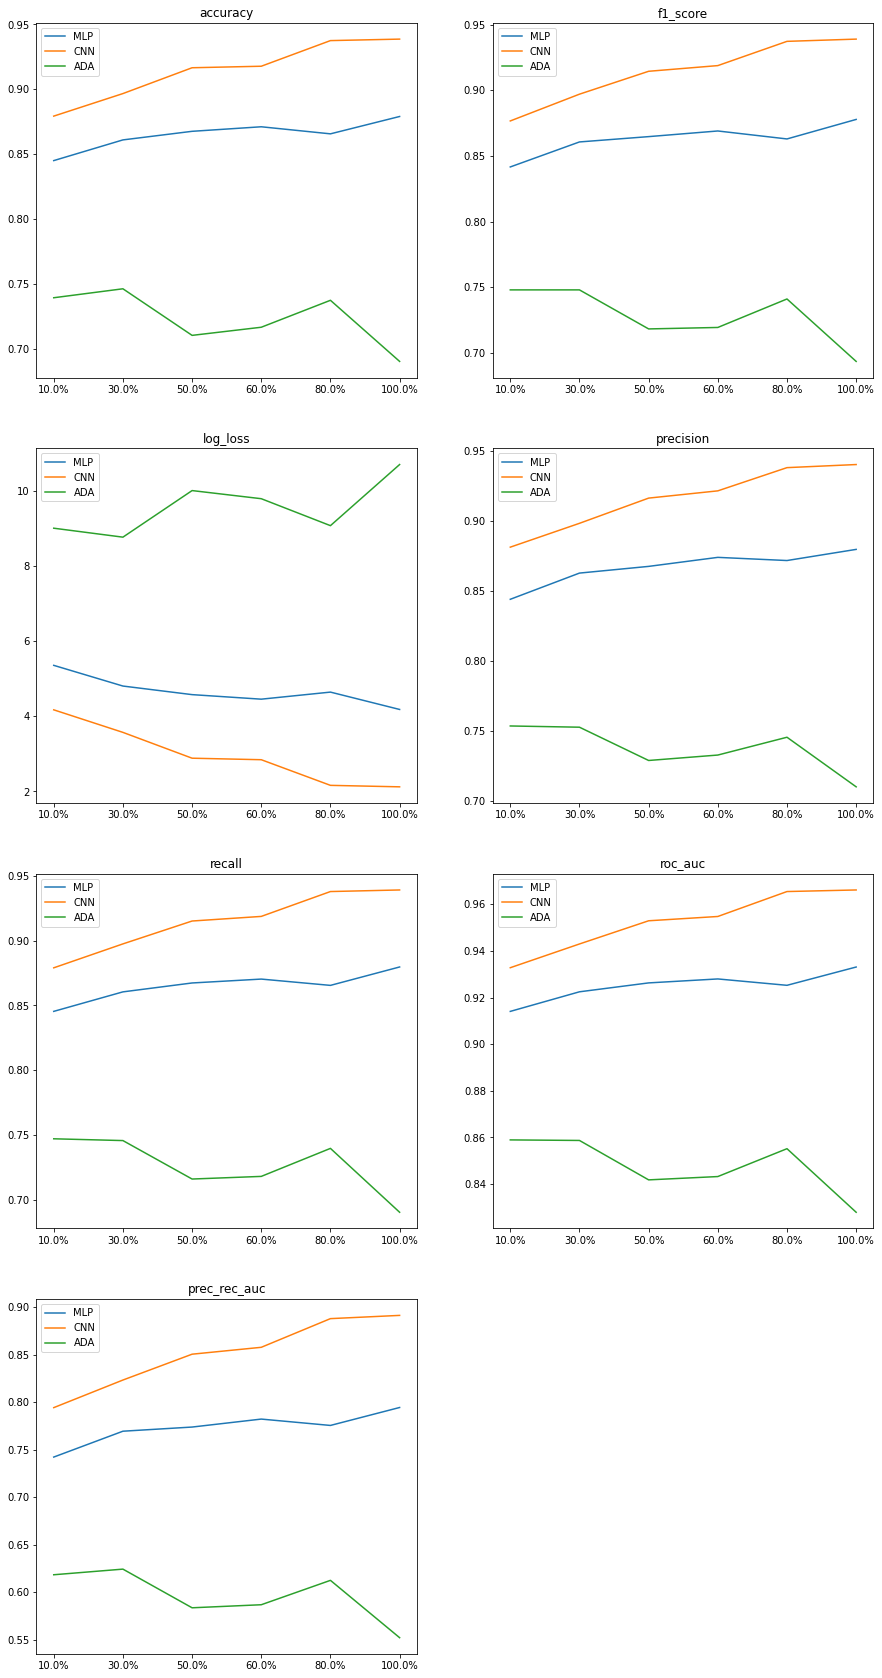

In [10]:
score_names = tests_time.columns[1:8]

ncols = 2
nrows = int(7 / ncols) + 1

fig_width = 7.5 * ncols
fig_height = 7.5 * nrows

plt.figure(figsize=(fig_width,fig_height))

counter = 1

for score in score_names:
    plt.subplot(nrows, ncols, counter)
    draw_plot(tests_time, score)
    counter = counter + 1
    
plt.savefig('3a_plot.png')

## 3b

In [14]:
tests_time = pd.read_pickle("3bb.pkl")

tests_time[['algorithm', 'time']] = tests_time.Name.apply(name_split)
tests_time

,Name,accuracy,f1_score,log_loss,precision,recall,roc_auc,prec_rec_auc,algorithm,time
0,AdaBoost | 41 secs,0.674143,0.660696,11.254707,0.662973,0.675028,0.819431,0.517244,AdaBoost,41
0,AdaBoost | 98 secs,0.673286,0.671653,11.284312,0.682087,0.675956,0.819818,0.536792,AdaBoost,98
0,AdaBoost | 194 secs,0.708143,0.708621,10.080389,0.720281,0.704137,0.835900,0.571904,AdaBoost,194
0,AdaBoost | 576 secs,0.730286,0.733719,9.315601,0.754045,0.728994,0.849529,0.610027,AdaBoost,576
0,AdaBoost | 1628 secs,0.771571,0.771118,7.889643,0.775195,0.771171,0.872892,0.648503,AdaBoost,1628
0,MLP | 1 epochs,0.814857,0.807750,6.394608,0.817601,0.816511,0.897969,0.701238,MLP,1
0,MLP | 3 epochs,0.866429,0.866259,4.613394,0.867767,0.866591,0.925871,0.774929,MLP,3
0,MLP | 5 epochs,0.855000,0.851723,5.008123,0.853429,0.855015,0.919452,0.754478,MLP,5
0,MLP | 15 epochs,0.875286,0.873481,4.307479,0.876812,0.875326,0.930732,0.788716,MLP,15
0,MLP | 25 epochs,0.881714,0.880659,4.085444,0.881988,0.880490,0.933678,0.798737,MLP,25


In [15]:
def draw_MLP_CNN_plot(df, score):
    MLP_df = df[df['algorithm'] == 'MLP']
    CNN_df = df[df['algorithm'] == 'CNN']

    plt.title(score)
    plt.plot(MLP_df['time'], MLP_df[score], label='MLP')
    plt.plot(CNN_df['time'], CNN_df[score], label='CNN')
    plt.legend()
    
def draw_ADA_plot(df, score):
    ADA_df = df[df['algorithm'] == 'AdaBoost']
    
    plt.title(score)
    plt.plot(ADA_df['time'], ADA_df[score], label='ADA')
    plt.legend()
    

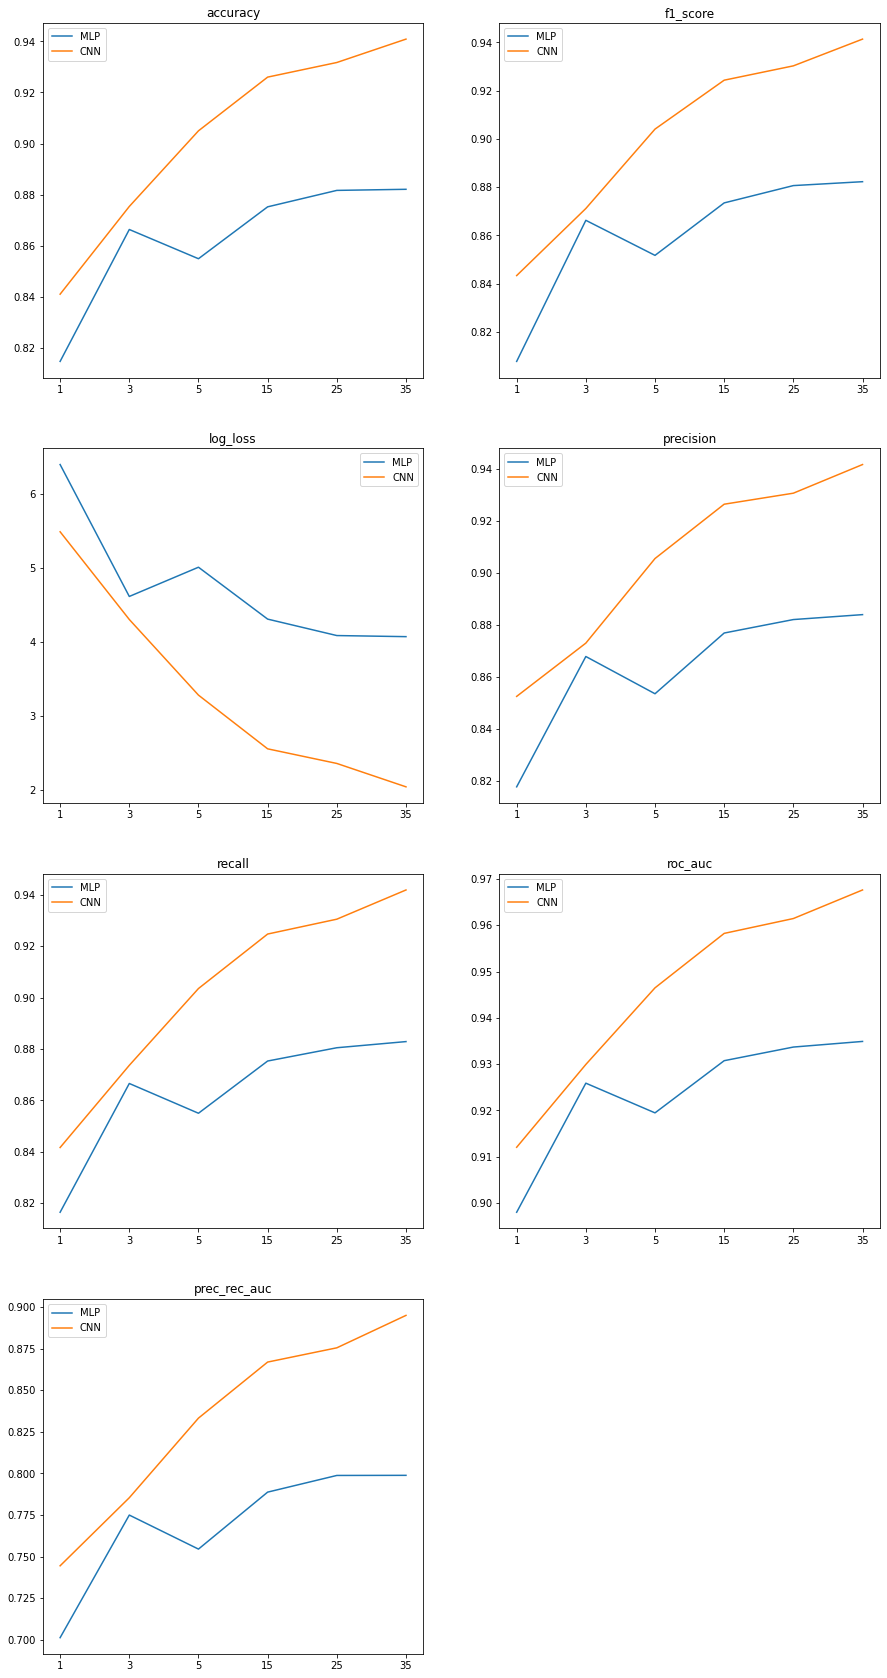

In [16]:
score_names = tests_time.columns[1:8]

ncols = 2
nrows = int(7 / ncols) + 1

fig_width = 7.5 * ncols
fig_height = 7.5 * nrows

plt.figure(figsize=(fig_width,fig_height))

counter = 1

for score in score_names:
    plt.subplot(nrows, ncols, counter)
    draw_MLP_CNN_plot(tests_time, score)
    counter = counter + 1
    
plt.savefig('3b_plot.png')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

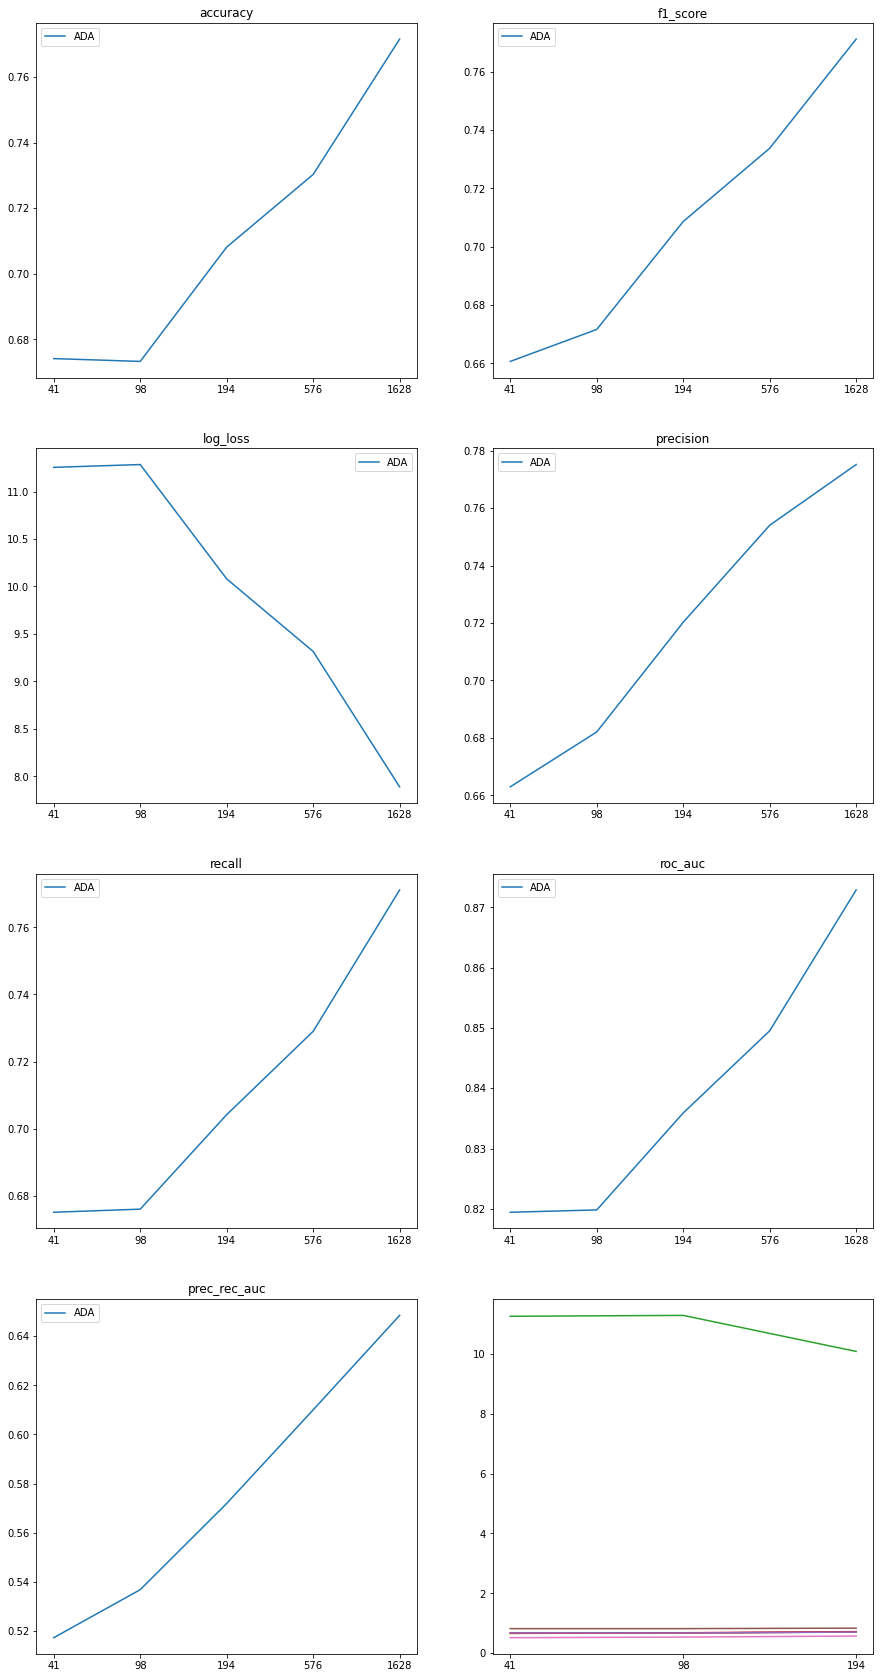

In [17]:
score_names = tests_time.columns[1:8]

ncols = 2
nrows = int(7 / ncols) + 1

fig_width = 7.5 * ncols
fig_height = 7.5 * nrows

plt.figure(figsize=(fig_width,fig_height))

counter = 1

for score in score_names:
    plt.subplot(nrows, ncols, counter)
    draw_ADA_plot(tests_time, score)
    counter = counter + 1

for score in tests_time.columns[1:8]:
    plt.subplot(nrows, ncols, 8)
    plt.plot(tests_time[:3]['time'], tests_time[:3][score], label='ADA')
    
plt.savefig('3b_ada_plot.png')

# 4

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

tests_time = pd.read_pickle("44.pkl")

mangling_0 = pd.read_pickle("3aa.pkl")

mangling_0[['algorithm', 'data']] = mangling_0.Name.apply(name_split)

mangling_0 = mangling_0[mangling_0['data'] == '50.0%']

mangling_0

tests_time[['algorithm', 'mangling']] = tests_time.Name.apply(name_split)
tests_time = pd.concat([tests_time, mangling_0])
tests_time['mangling'].fillna('0.0%', inplace=True)
tests_time = tests_time.drop('data', axis=1)
tests_time['mangling'] = tests_time['mangling'].apply(lambda x: float(x.strip("%")) / 100)
tests_time

,Name,accuracy,f1_score,log_loss,precision,recall,roc_auc,prec_rec_auc,algorithm,mangling
0,MLP | 1.0% mangling,0.727714,0.706931,9.404415,0.735001,0.726581,0.848189,0.594932,MLP,0.01
0,MLP | 5.0% mangling,0.690714,0.675783,10.682350,0.739160,0.688164,0.826941,0.533126,MLP,0.05
0,MLP | 15.0% mangling,0.776429,0.747428,7.721884,0.737148,0.775088,0.875103,0.662083,MLP,0.15
0,MLP | 30.0% mangling,0.726429,0.694929,9.448822,0.743245,0.729286,0.849453,0.600243,MLP,0.30
0,MLP | 50.0% mangling,0.774000,0.759196,7.805763,0.777235,0.773175,0.874046,0.651529,MLP,0.50
0,MLP | 100.0% mangling,0.097857,0.017827,31.158910,0.009786,0.100000,0.500000,0.100000,MLP,1.00
0,CNN | 1.0% mangling,0.862571,0.859230,4.746615,0.862418,0.861175,0.922965,0.766735,CNN,0.01
0,CNN | 5.0% mangling,0.829714,0.818981,5.881460,0.833432,0.828163,0.904632,0.718065,CNN,0.05
0,CNN | 15.0% mangling,0.803571,0.793650,6.784403,0.807451,0.806404,0.892313,0.685420,CNN,0.15
0,CNN | 30.0% mangling,0.807429,0.805027,6.651182,0.810626,0.808755,0.893671,0.690830,CNN,0.30


In [48]:
def draw_plot(df, score):
    ADA_df = df[df['algorithm'] == 'AdaBoost'].sort_values('mangling')
    MLP_df = df[df['algorithm'] == 'MLP'].sort_values('mangling')
    CNN_df = df[df['algorithm'] == 'CNN'].sort_values('mangling')
    
    plt.title(score)
    plt.plot(MLP_df['mangling'], MLP_df[score], label='MLP')
    plt.plot(CNN_df['mangling'], CNN_df[score], label='CNN')
    plt.plot(ADA_df['mangling'], ADA_df[score], label='ADA')
    plt.legend()

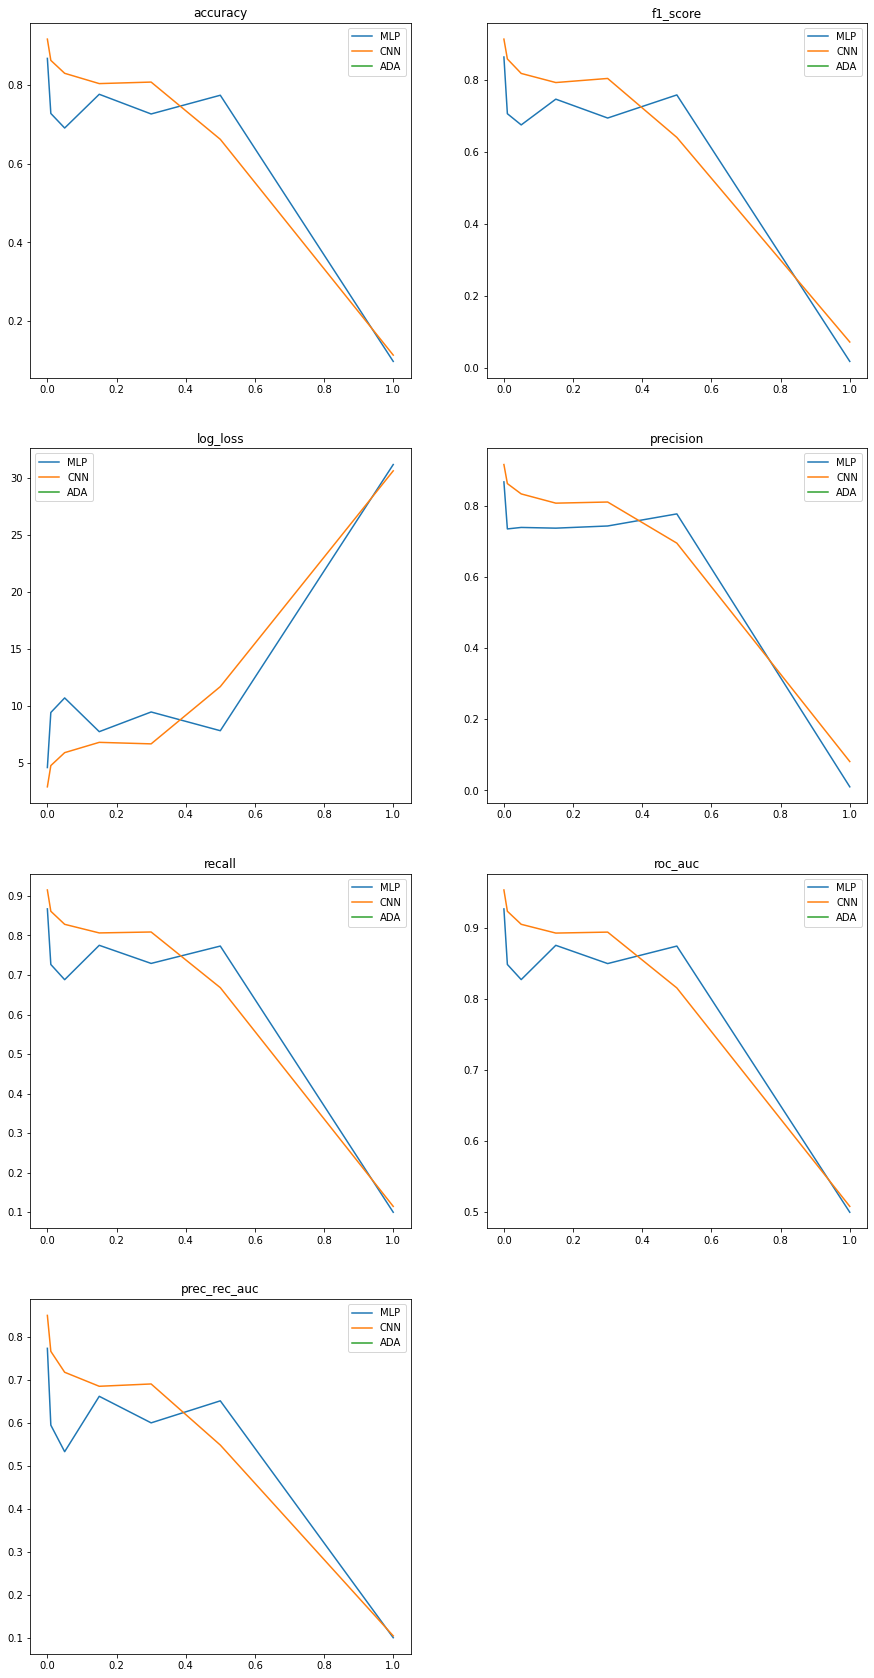

In [49]:
score_names = tests_time.columns[1:8]

ncols = 2
nrows = int(7 / ncols) + 1

fig_width = 7.5 * ncols
fig_height = 7.5 * nrows

plt.figure(figsize=(fig_width,fig_height))

counter = 1

for score in score_names:
    plt.subplot(nrows, ncols, counter)
    draw_plot(tests_time, score)
    counter = counter + 1
    
plt.savefig('4.png')